In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [8]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [9]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
# ^ Split the data as Input and Output Features
# * Independent Feature
X = pd.DataFrame(iris['data'], columns=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm'])

# * Dependent Feature
y = iris['target']

In [12]:
# ^ Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2) 

In [ ]:
# ^ Apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

treeclassifier = DecisionTreeClassifier()

# ^ Post Prunning
# treeclassifier = DecisionTreeClassifier(max_depth=2)

In [23]:
treeclassifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


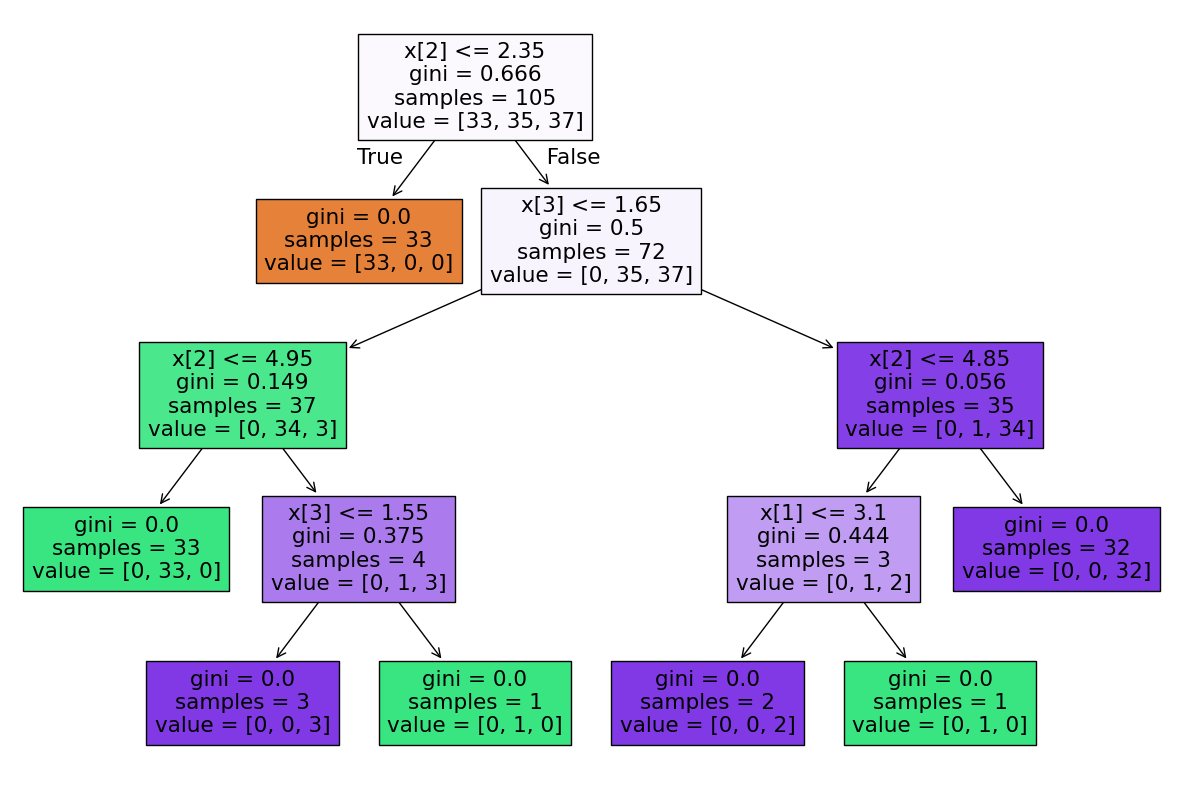

In [29]:
# ^ Visualize the Decision Tree
from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(treeclassifier, filled=True)
plt.show()

In [20]:
# & Prediction
y_pred = treeclassifier.predict(X_test)

In [21]:
# performance metrics
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[17  0  0]
 [ 0 14  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



##### Pre Pruning and Hyperparameter Tuning

In [34]:
# ^ Hyperparameter Tuning
param = {
    "criterion" : ['gini', 'entropy', 'log_loss'],
    "splitter": ['best', 'random'],
    "max_depth": [1,2,3,4,5],
    "max_features": [ 'sqrt', 'log2'],
}

In [35]:
from sklearn.model_selection import GridSearchCV

treemodel = DecisionTreeClassifier()

grid = GridSearchCV(treeclassifier, param_grid=param, cv=5, scoring='accuracy')

In [39]:
grid.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['sqrt', 'log2'], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [45]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2')
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'splitter': 'best'}
0.9619047619047618
34


In [46]:
y_pred = grid.predict(X_test)

In [48]:
# ^ performance metrics
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  0  0]
 [ 0 14  1]
 [ 0  1 12]]
0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

